## Session 7

#### Spark_Structure_streaming
- Introduction and Streaming Basics
- Streaming Introduction
- Structured Streaming (Spark 3+)
- Continuous Application
- Table Paradigm, Result Table
- Steps for Structured Stream
- Sources and Sinks
- Consuming Kafka Data
- Kafka Overview
- Structured Streaming - "kafka" format
- Processing the Stream

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode
from pyspark.sql.functions import split

spark = SparkSession \
    .builder \
    .appName("StructuredNetworkWordCount") \
    .getOrCreate()

In [7]:
spark

In [8]:
# Create DataFrame representing the stream of input lines from connection to localhost:9999
lines = spark \
    .readStream \
    .format("socket") \
    .option("host", "localhost") \
    .option("port", 9999) \
    .load()

# Split the lines into words
words = lines.select(
   explode(
       split(lines.value, " ")
   ).alias("word")
)

# Generate running word count
wordCounts = words.groupBy("word").count()

In [ ]:
 # Start running the query that prints the running counts to the console
query = wordCounts \
    .writeStream \
    .outputMode("complete") \
    .format("console") \
    .start()

query.awaitTermination()

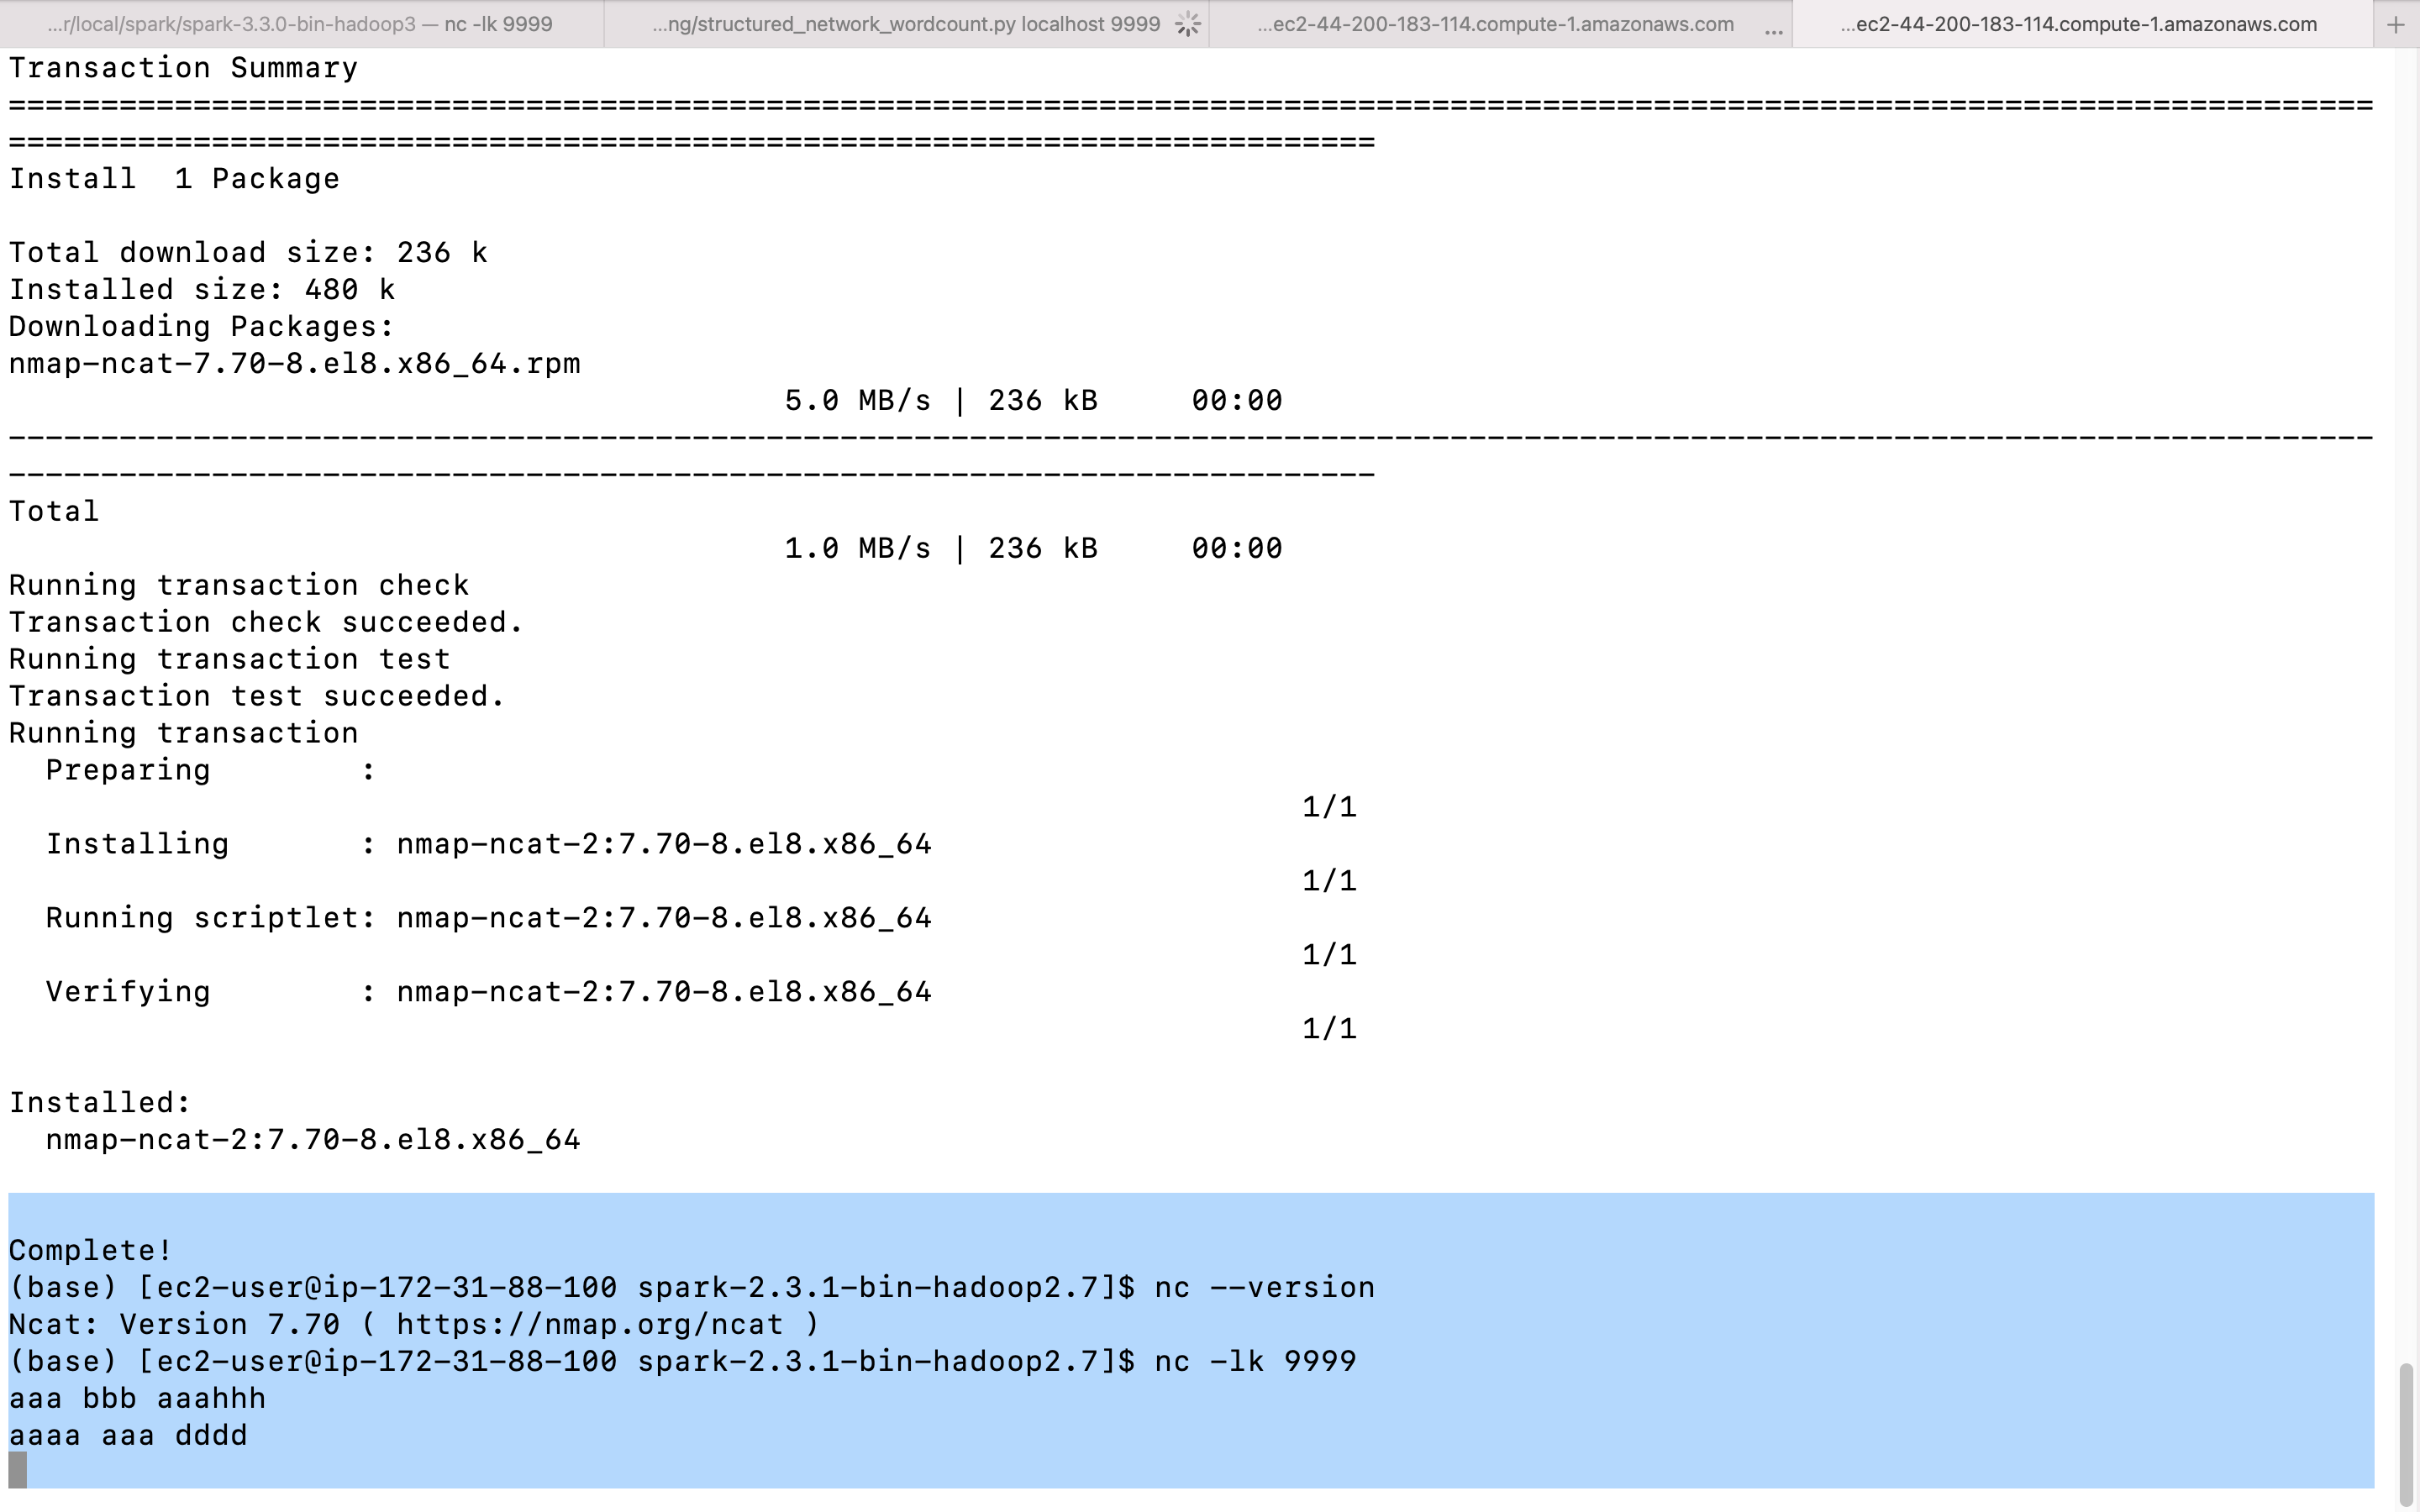

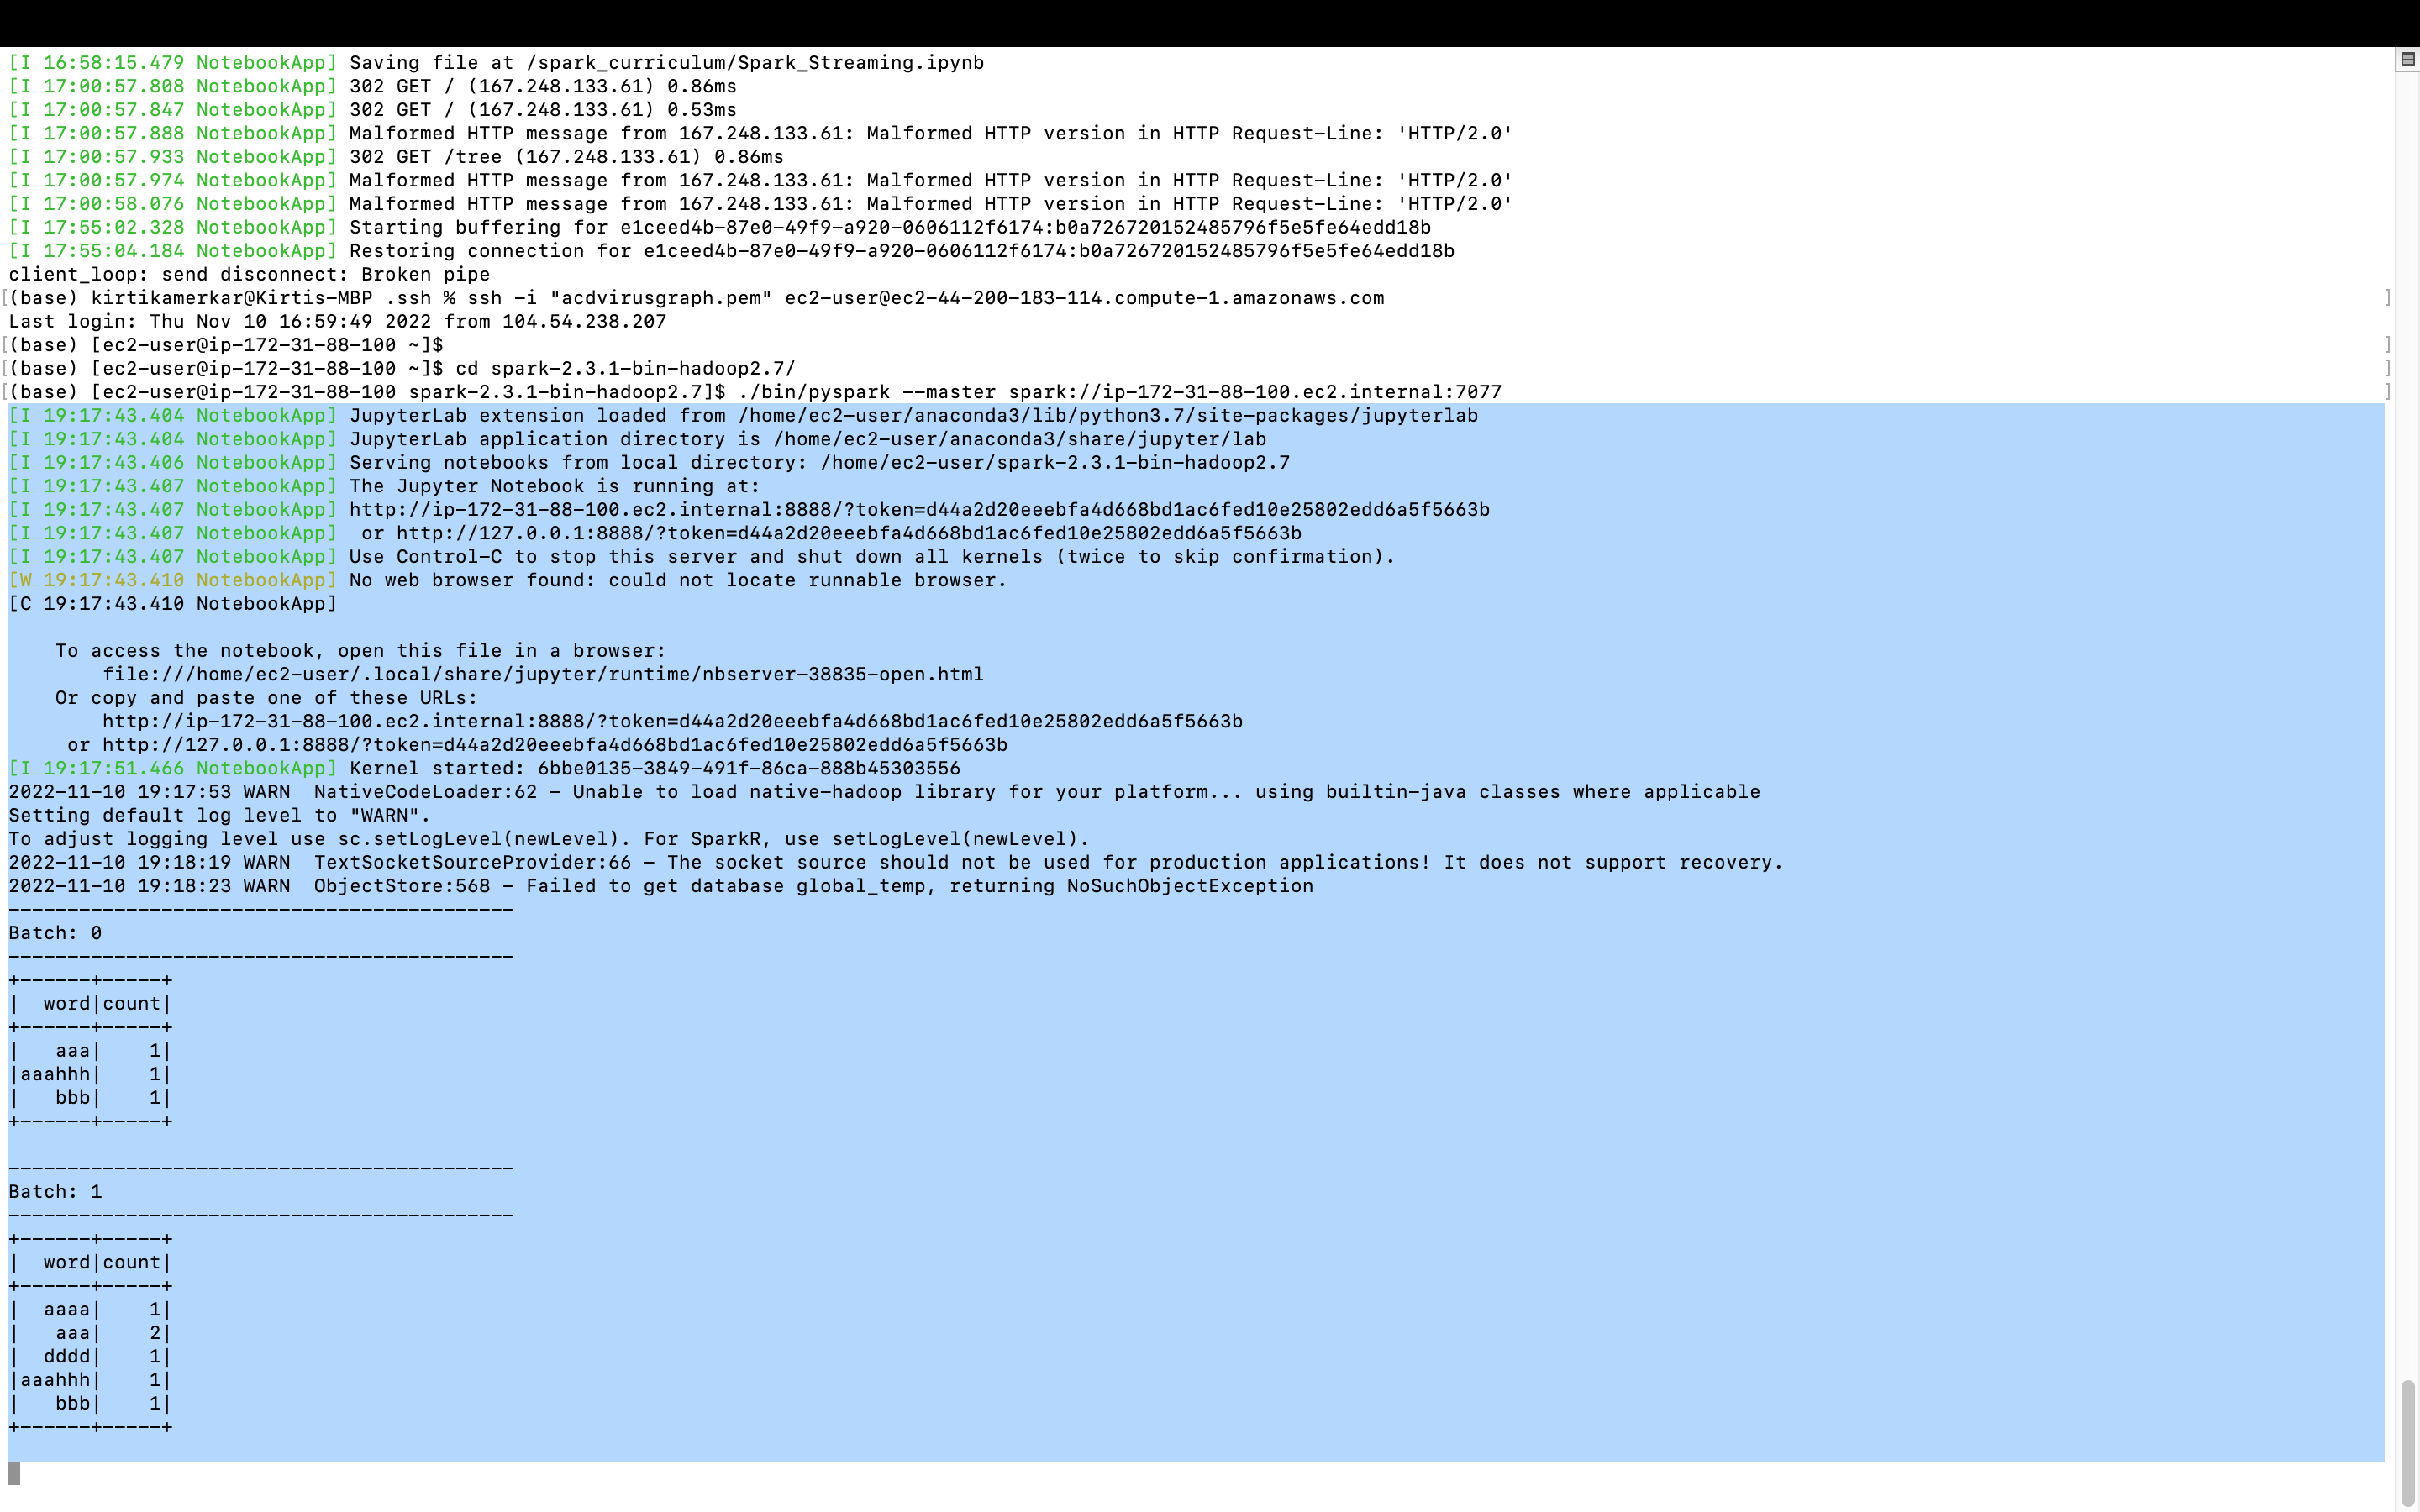

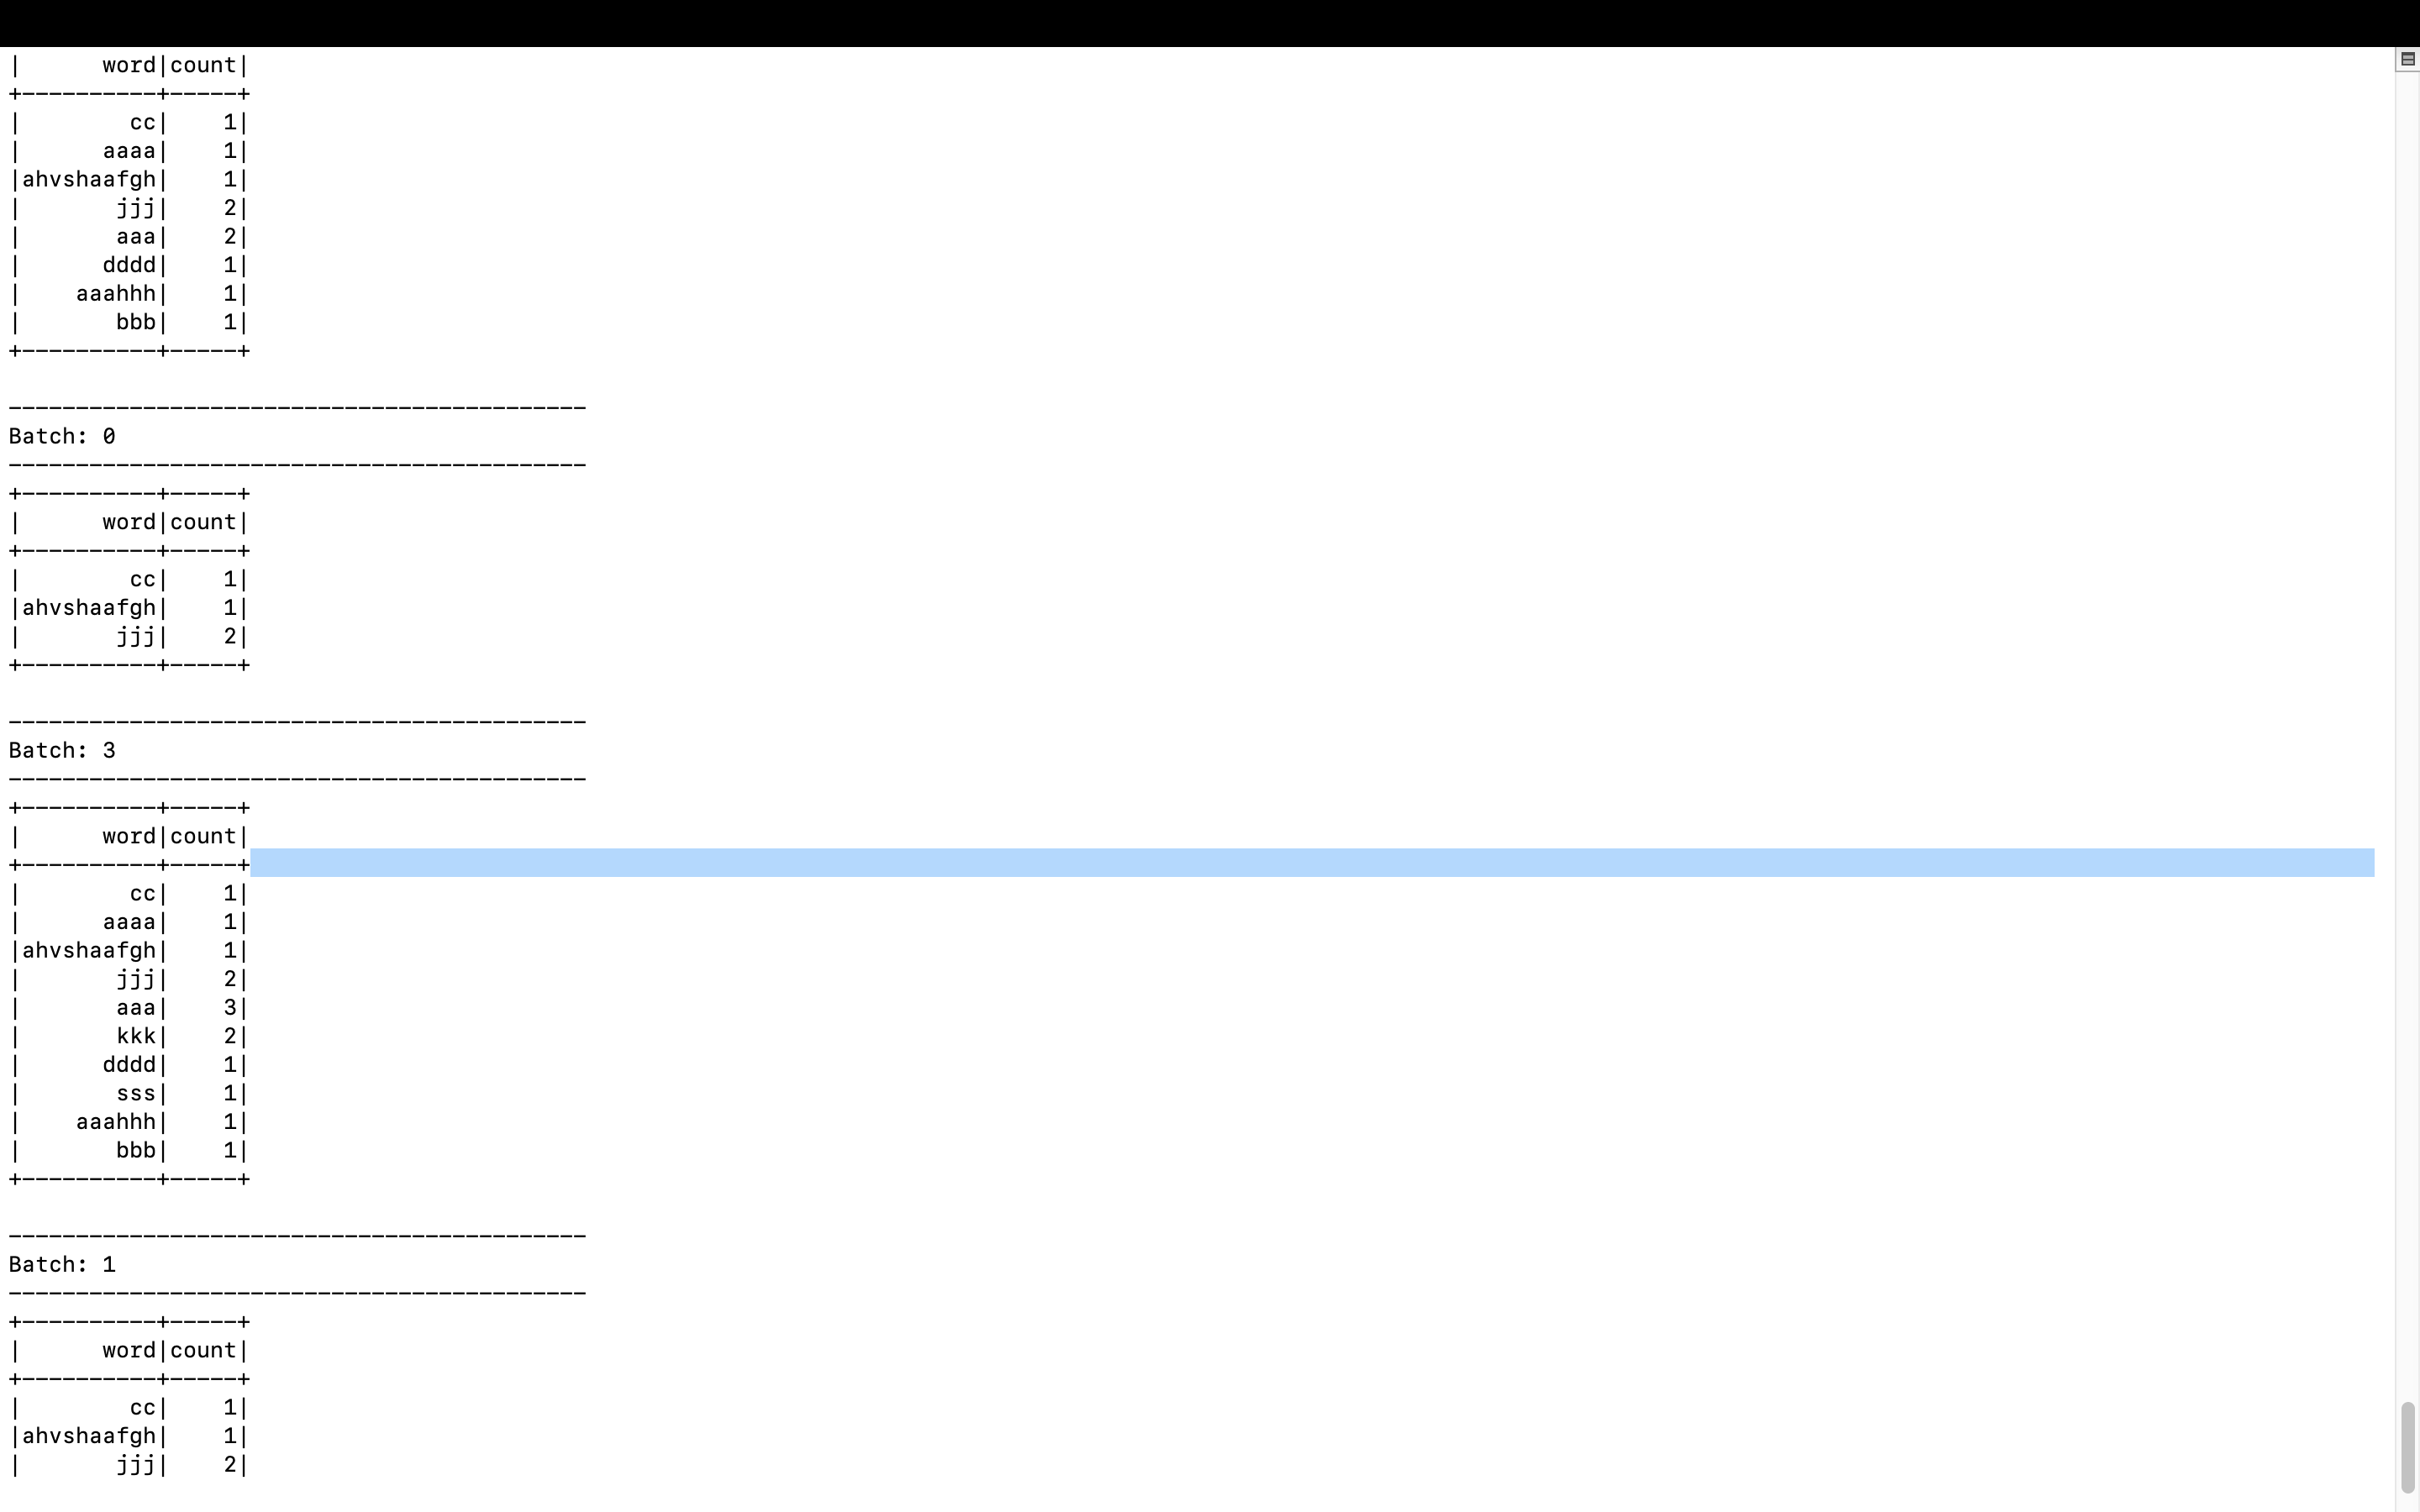